# Summary

In [1]:
import pandas as pd
df = pd.read_csv('data/airline_delay_causes_2015.csv')
df.head()

year   month carrier            carrier_name airport  \
0  2015       1      AA  American Airlines Inc.     JFK   
1  2015       1      AA  American Airlines Inc.     LAX   
2  2015       1      AA  American Airlines Inc.     DFW   
3  2015       1      AA  American Airlines Inc.     OGG   
4  2015       1      AA  American Airlines Inc.     HNL   

                                        airport_name  arr_flights  arr_del15  \
0        New York, NY: John F. Kennedy International         1369        322   
1         Los Angeles, CA: Los Angeles International         2633        445   
2  Dallas/Fort Worth, TX: Dallas/Fort Worth Inter...        12466       2463   
3                       Kahului, HI: Kahului Airport          100         22   
4               Honolulu, HI: Honolulu International          169         50   

   carrier_ct   weather_ct     ...       late_aircraft_ct  arr_cancelled  \
0       73.31         8.44     ...                 103.47             86   
1      157.17        25.21     ...                 153.43             41   
2      645.29        64.66     ...                 982.99            203   
3       11.53         0.00     ...                   4.00              3   
4       28.69         0.00     ...                   6.27              0   

   arr_diverted   arr_delay   carrier_delay  weather_delay  nas_delay  \
0             3       20055            5273            999       6358   
1             4       25261           10914           1460       3293   
2             6      167313           66714           5055      24137   
3             0        1776            1207              0        188   
4             4        4175            2602              0        523   

   security_delay  late_aircraft_delay  Unnamed: 21  
0               0                 7425          NaN  
1              42                 9552          NaN  
2             123                71284          NaN  
3               0                  381          NaN  
4               0                 1050          NaN  

[5 rows x 22 columns]

In [2]:
df.columns = df.columns.str.strip()

Since month in dimple only except 2 digit format, change this

In [3]:
df['month'] = df['month'].map(lambda x: '0' + str(x) if len(str(x)) < 2 else x)

In [4]:
df.month.unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', 10], dtype=object)

We want to have total number of operations and total minutes delay. So we're going to aggregate it per month.

In [10]:
agg_month_sum = df.groupby('month',as_index=False).sum()
not_ontime_flights  = ['arr_cancelled','arr_diverted','arr_del15']
agg_month_sum['on_time_flights'] = agg_month_sum['arr_flights'] - agg_month_sum[not_ontime_flights].sum(axis=1)

delayed_columns = agg_month_sum.columns[agg_month_sum.columns.str.endswith('_delay')]
agg_month_sum[delayed_columns] = agg_month_sum[delayed_columns].applymap(lambda x: x/60)

agg_month_sum.to_csv('agg_month_sum_airlines_2015.csv_',index=False)

In [10]:
%matplotlib inline

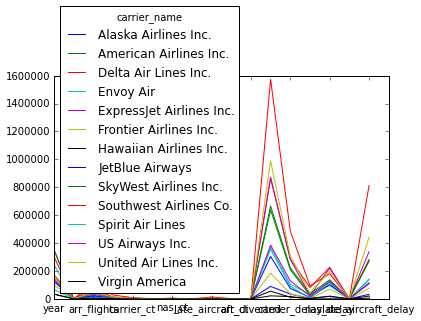

In [16]:
df[df.month == 6].groupby('carrier_name').sum().T.plot()

In [7]:
df['delay_minutes_per_delayed_flight'] = (df.carrier_delay / df.carrier_ct)
date_df = df.groupby(['carrier_name','month'],as_index=False).delay_minutes_per_delayed_flight.mean()

In [9]:
date_df.to_csv('carr_delay_2015.csv_',index=False)

In [40]:
%matplotlib inline

In [ ]:
df.groupby('carr_delay_2015.csv_')

In [44]:
1206011 / 19579

61